# Red Wine Quality Prediction with Machine Learning

### Context

There are two datasets available that describe the composition and the quality of two variants of Portuguese "Vinho Verde" wine. This wine originated in the north of Portugal and for a time, now, property of the Minho Region, one of the most beautiful regions in Portugal the one that I gladly call home. 
The main goal of this problem is to find which features of these kinds of wine are the ones that provide the most information about its quality. I will also try to make a prediction of a wine's quality and check if it matches with the real quality. Although this dataset can be viewed as a classification (multiclass classification) or a regression problem, we will solve it using regression techniques.

This dataset is available on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

### Table of Content 

1. [Firt Look](#First_look)
    1. [Imports](#Imports)
    
    2. [Data Cleaning](#Data_Cleaning)
    
    3. [Data Exploration](#Data_Explor)
    
    4. [Data Visualization](#Data_visualization)
    
2. [Feature Selection](#Feature_Selection)
3. [Detecting/Handling_Outliers_Z-Score](#Detecting/Handling_Outliers_Z-Score)
3. [Regression Models](#Regression_Models)
4. [Score and Root Mean Square Error](#Score&RMSE)

### First_look
#### Imports 

In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from math import sqrt
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler

#### Data_Cleaning

In [6]:
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [18]:
df.columns = df.columns.str.replace(' ', '_')

As we can see, the name of some columns contains spaces, which is something we do not really want when treating data, this is why we are going to replace these spaces with "_".


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately for us, we find there are no null values and all datatypes seem to be right, since there are no object datatypes that must be converted to numerical values.

#### Data_Explor


After checking our dataset is fine and "ready to go" we are going to explore the data a little bit more, we are going to plot important information that will help us check how features behave and how they are correlated. We will also try to extract as much information as we can from it to help us understand the dataset better.

Knowing our target variable is "quality", we are now going to plot some information about it. Let's see which values this column contains and how many of them there are.


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

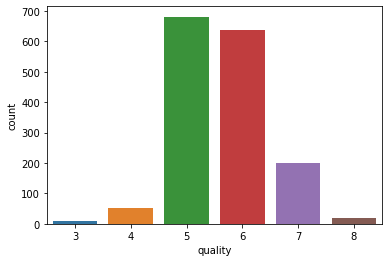

In [8]:
sns.countplot(df['quality'])
df['quality'].value_counts()

Now that we got information about our target variable we are going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.

In [9]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

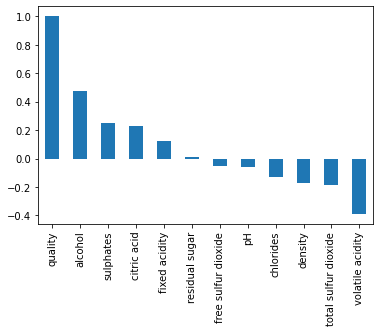

In [10]:
correlations.plot(kind='bar')

Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.

<AxesSubplot:>

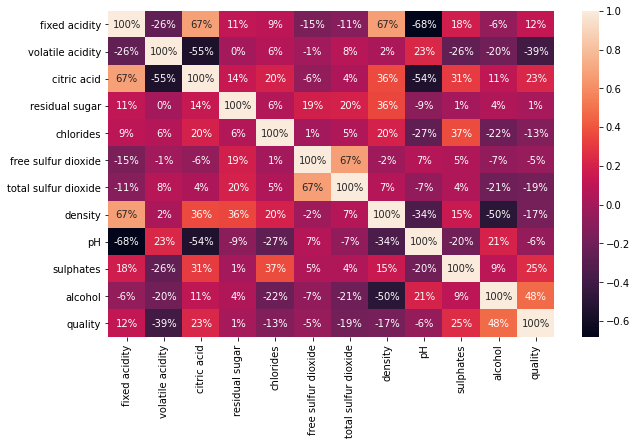

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.

From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [12]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the different qualities.

##### Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

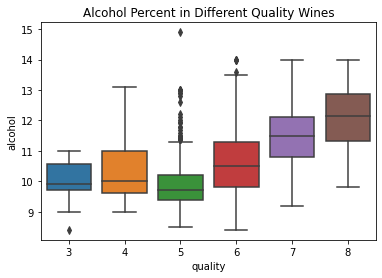

In [13]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now:

In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [14]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [15]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the most with quality are the same as we obtained before. However, the difference of values shown on the boxplot can be explained due to having (although the highest) a poor correlation with quality.

##### Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

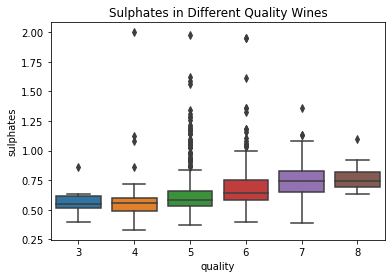

In [16]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

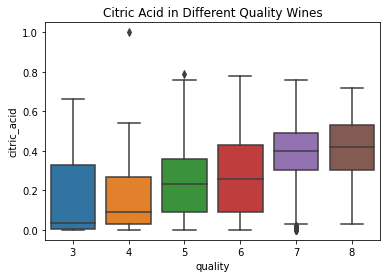

In [19]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

##### Acetic Acid Presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

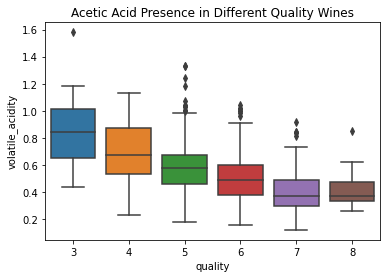

In [20]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

#### Data_visualization

n the last subsection we plotted some box graphics in order to see which values belong to each quality. For further investigations we are now going to plot histograms for each of those important features so we can see better the correlation between the distribution of values from each feature and quality. To do so, we are first going to separate the quality values in three different groups, so we can do things a little bit easier:

    - Low: contains wines whose quality is 3 or 4.
    - Medium: contains wines whose quality is 5 or 6.
    - High: contains wines whose quality is 7 or 8.


In [21]:
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

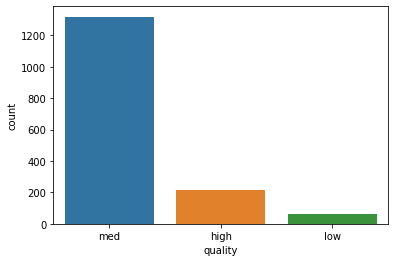

In [22]:
sns.countplot(df_aux['quality'])

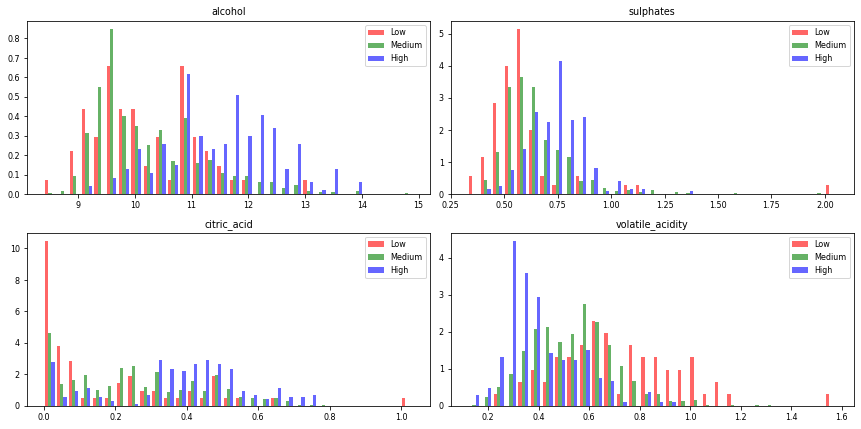

In [23]:
flistt = ['alcohol','sulphates','citric_acid','volatile_acidity']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6,density=True,  label=['Low','Medium','High'], color=['red','green','blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()



As we can see in the histograms, higher values of alcohol, sulphates and citric acid seem to belong to higher quality wines while higher values of volatile acity are present in lower quality wines.

### Feature_Selection

Now that we have already studied our dataset through histograms and different graphics it's time to select some features we will use in our machine learning algorithms. In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

In [24]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

In [83]:
df.nunique(axis=0)# returns the number of unique values for each variable.

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

#### Data Engeneering/Add Feature

In [91]:
df['tasty'] = [0 if x < 6 else 1 for x in df['quality']]

### Detecting/Handling_Outliers_Z-Score

A Z-Score is a measure of position that indicates the number of standard deviations a data value lies from the mean.
Any z-score less than -3 or greater than 3, is an outlier.

Note: From the empirical rule we see that 99.7% of our data should be within three standard deviations from the mean.


In [92]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.96024611 0.78782264 1.07200445]
 [0.29854743 1.96744245 1.39147228 ... 0.58477711 0.78782264 1.07200445]
 [0.29854743 1.29706527 1.18607043 ... 0.58477711 0.78782264 1.07200445]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54162988 0.45084835 0.93283195]
 [1.39015528 0.65462046 0.77526673 ... 0.20930812 0.78782264 1.07200445]
 [1.33270223 1.21684919 1.02199944 ... 0.54162988 0.45084835 0.93283195]]


In [93]:
threshold = 3

The first array is the list of row numbers & the 2nd array is the corresponding column number of the outlier. For example, the first outlier is in row 13, column 9. Once we calclulated the Z-score, we can remove the outlier to clean our data, by peforming the action below. 

In [94]:
newdf = df[(z < 3).all(axis=1)]

In [95]:
newdf

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tasty
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [97]:
df = newdf[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality','tasty']]

### Regression_Models

On this section, after having understood our data and dropped some useless features, we are going to make an estimation of quality based on the other features. To do so we are going to use Linear Regression, Decision Tree Rregressor and Random Forest Regressor. We will also plot the values of prediction and true quality and the confussion marices, so we can see how many of the predicted values are right (the diagonal of the matrix).

In [175]:
#X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
X = df.iloc[:, :-1].values 
Y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<div class="alert alert-info"><h4>Linear Regression</h4><p>


- Linear regression is a statistical regression method which is used for predictive analysis.
- It is one of the very simple and easy algorithms which works on regression and shows the relationship between the continuous variables.
- It is used for solving the regression problem in machine learning.
- Linear regression shows the linear relationship between the independent variable (X-axis) and the dependent variable (Y-axis), hence called linear regression.
- If there is only one input variable (x), then such linear regression is called simple linear regression. And if there is more than one input variable, then such linear regression is called multiple linear regression.
- The relationship between variables in the linear regression model can be explained using the below image. Here we are predicting the salary of an employee on the basis of the year of experience.

- The mathematical equation for Linear Regression is $$Y= aX+b$$

Here, Y = dependent variables (target variables),
X= Independent variables (predictor variables),
a and b are the linear coefficients

In [178]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_prediction_lr = regressor.predict(X_test)

<div class="alert alert-info"><h4>Polynomial Regression</h4><p>
    
- Polynomial Regression is a type of regression which models the non-linear dataset using a linear model.
- It is similar to multiple linear regression, but it fits a non-linear curve between the value of x and corresponding conditional values of y.
- Suppose there is a dataset which consists of datapoints which are present in a non-linear fashion, so for such case, linear regression will not best fit to those datapoints. To cover such datapoints, we need Polynomial regression.
- In Polynomial regression, the original features are transformed into polynomial features of given degree and then modeled using a linear model. Which means the datapoints are best fitted using a polynomial line.

- The equation for polynomial regression also derived from linear regression equation that means Linear regression equation Y= b0+ b1x, is transformed into Polynomial regression equation Y= b0+b1x+ b2x2+ b3x3+.....+ bnxn.
- Here Y is the predicted/target output, b0, b1,... bn are the regression coefficients. x is our independent/input variable.
- The model is still linear as the coefficients are still linear with quadratic


In [179]:
#Fit the model and make prediction

regressor = PolynomialFeatures(degree=2)
X_train_poly = regressor.fit_transform(X_train)
X_test_poly = regressor.fit_transform(X_test)

l_regressor = LinearRegression()
l_regressor.fit(X_train_poly, y_train)
y_prediction_pr = l_regressor.predict(X_test_poly)

<div class="alert alert-info"><h4>Decision Tree Regressor</h4><p>

- Decision Tree is a supervised learning algorithm which can be used for solving both classification and regression problems.
- It can solve problems for both categorical and numerical data
- Decision Tree regression builds a tree-like structure in which each internal node represents the "test" for an attribute, each branch represent the result of the test, and each leaf node represents the final decision or result.
- A decision tree is constructed starting from the root node/parent node (dataset), which splits into left and right child nodes (subsets of dataset). These child nodes are further divided into their children node, and themselves become the parent node of those nodes.

In [180]:
#Fit the model and make prediction
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)

<div class="alert alert-info"><h4>Random Forest Regressor</h4><p>
   
- Is one of the most powerful supervised learning algorithms which is capable of performing regression as well as classification tasks.
- Is an ensemble learning method which combines multiple decision trees and predicts the final output based on the average of each tree output. The combined decision trees are called as base models, and it can be represented more formally as: $$ g(x)= f0(x)+ f1(x)+ f2(x)+....$$ 

- Random forest uses Bagging or Bootstrap Aggregation technique of ensemble learning in which aggregated decision tree runs in parallel and do not interact with each other.
- With the help of Random Forest regression, we can prevent Overfitting in the model by creating random subsets of the dataset.


In [186]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 0)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)

<div class="alert alert-info"><h4>Ridge Regression</h4><p>

- Ridge regression is one of the most robust versions of linear regression in which a small amount of bias is introduced so that we can get better long term predictions.
- The amount of bias added to the model is known as Ridge Regression penalty. We can compute this penalty term by multiplying with the lambda to the squared weight of each individual features.
- The equation for ridge regression will be: $$L(x,y) = Min(\sum_{i=1}^{n}{(y_i - W_i x_i)^2} + \lambda\sum_{i=1}^{n}(w_i)^2)$$
- A general linear or polynomial regression will fail if there is high collinearity between the independent variables, so to solve such problems, Ridge regression can be used.
- Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.
- It helps to solve the problems if we have more parameters than samples.


In [187]:
regressor = Ridge(alpha=0.01)
regressor.fit(X_train, y_train)
y_prediction_rr = regressor.predict(X_test)

<div class="alert alert-info"><h4>Lasso Regression</h4><p>

- Lasso regression is another regularization technique to reduce the complexity of the model.
- It is similar to the Ridge Regression except that penalty term contains only the absolute weights instead of a square of weights.
- Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.
- It is also called as L1 regularization. The equation for Lasso regression will be: 
$$L(x,y) = Min(\sum_{i=1}^{n}{(y_i - W_i x_i)^2} + \lambda\sum_{i=1}^{n}|w_i|)$$


In [188]:
regressor = Lasso(alpha=0.01)
regressor.fit(X_train, y_train)
y_prediction_lassor = regressor.predict(X_test)

### Score&RMSE 

After having prepared our models, it's now time to evaluate them. To do so we are going to use RMSE (Root Mean Square Error) which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are so RMSE is a measure of how spread out these residuals are.


When deciding which regression algorithm is better by looking at RMSE we would better choose the one with smaller value, so for this problem, Random Forest Regression seems to be the best fitting algorithm.

In [189]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Root Mean Square Error"]

ptbl.add_row(["Linear Regression", r2_score(y_test,y_prediction_lr), sqrt(mean_squared_error(y_test, y_prediction_lr))])
ptbl.add_row(["Polinomial Regression",r2_score(y_test,y_prediction_pr) ,sqrt(mean_squared_error(y_test, y_prediction_pr))])
ptbl.add_row(["Decision Tree Regression", r2_score(y_test,y_prediction_dt), sqrt(mean_squared_error(y_test, y_prediction_dt))])
ptbl.add_row(["Random Forest Regression", r2_score(y_test,y_prediction_rf), sqrt(mean_squared_error(y_test, y_prediction_rf))])
ptbl.add_row(["Ridge  Regression", r2_score(y_test,y_prediction_rr),sqrt(mean_squared_error(y_test, y_prediction_rr))])
ptbl.add_row(["Lasso Regression", r2_score(y_test,y_prediction_lassor),sqrt(mean_squared_error(y_test, y_prediction_lassor))])
            
             

print(ptbl)

+--------------------------+--------------------+------------------------+
|     Regressor Model      |     Precision      | Root Mean Square Error |
+--------------------------+--------------------+------------------------+
|    Linear Regression     | 0.7424222964668017 |  0.25315914697303626   |
|  Polinomial Regression   | 0.5577766089112874 |  0.33171136043687216   |
| Decision Tree Regression |        1.0         |          0.0           |
| Random Forest Regression |        1.0         |          0.0           |
|    Ridge  Regression     | 0.7419381122828825 |  0.25339697444059456   |
|     Lasso Regression     | 0.7436744133522819 |   0.2525430784953937   |
+--------------------------+--------------------+------------------------+


### Conclusions



After having obtained all the results through our models and plots, these are some things we can say about this problem and solution:

    - The vast majority of wines get a quality rating of five or six, while having good and bad wines seems more unlikely. There seem not to be any excellent wines (>8) on this database.

    - From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using regression algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.

    - Applying the concept 1-off Accuracy gives us much better results.

    - Random Forest and Linear Regression seem to be the best fitting models when solving this problem using regression.

    - Since there are only six different quality values in this dataset, it would be clever treating this problem as a multiclass classification problem (we can use the quality grouping approach we took earlier) and we might even get better results.
    
    
    1. Out of the 11 features we examined, the top 3 significant features that help the vinter brew a delicious Red Wine are low levels of sulfur dioxide, and high levels of sulphates & alcohol.

2. Our Random Forest algorithm yields the highest R2 value, 83%! Any R2 above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 83% is the ideal accuracy!

3. Our machine learning algorithm can now predict the red wine quality given it's ingredients. By detecting these important features, we may prevent our vintner from going out of business or loosing any profit! This is extremly powerful because now we can properly see which components of wine people prefer & thus maximize our profit!

